In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
train = pd.read_csv("D:/Code/py_code/Artificial-Neural-Network/Single-Layer-Perceptron/data/train_data_cl_v2.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
test = pd.read_csv("D:/Code/py_code/Artificial-Neural-Network/Single-Layer-Perceptron/data/test_data_cl_v2.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## **Perbandingan Data Train dan Data Test**

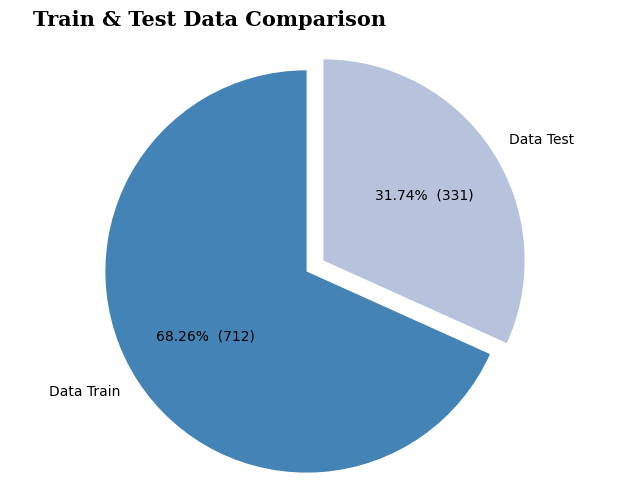

In [56]:
# Pie chart
labels = ['Data Train', 'Data Test']
sizes = [train.shape[0], test.shape[0]]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1)
#add colors
colors = ['#4483b6','#b7c3dc']
fig1, ax1 = plt.subplots()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=make_autopct(sizes),
        shadow=False, startangle=90)

ax1.axis('equal')
fig1.text(0.06, 1, 'Train & Test Data Comparison', fontsize=15, fontweight='bold', fontfamily='serif')
plt.tight_layout()
plt.show()

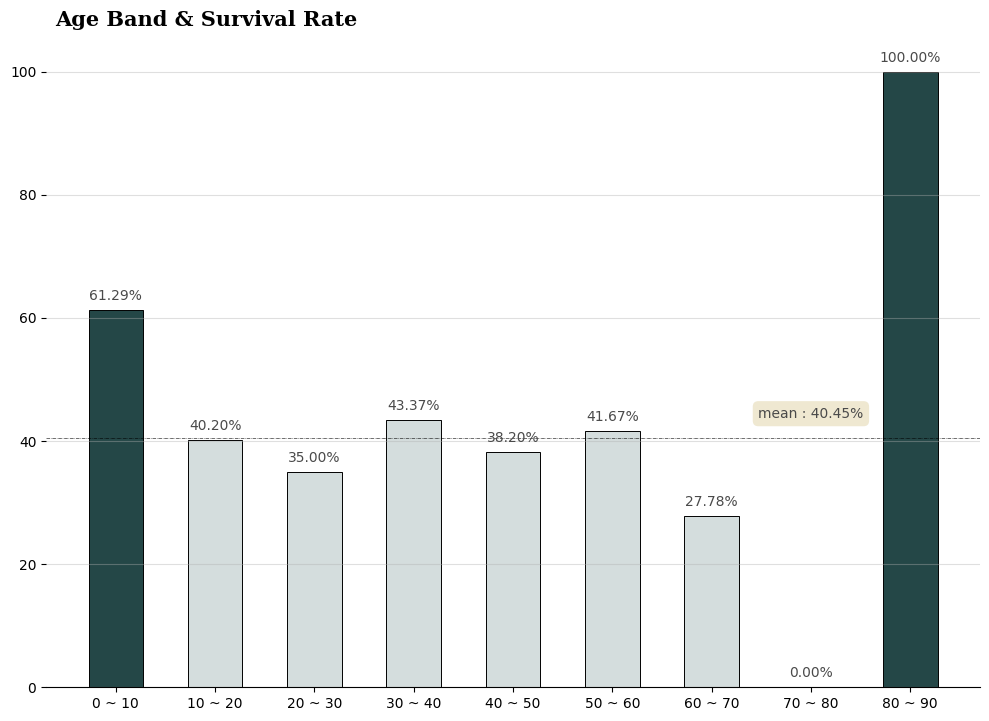

In [57]:
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

train['age_band'] = train['Age'].apply(age_band)
titanic_age = train[['age_band', 'Survived']].groupby('age_band')['Survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

color_map = ['#d4dddd' for _ in range(9)]
color_map[0] = color_map[8] = '#244747' # color highlight

ax.bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], 
       color=color_map, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)



for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)


# Annotation Part
for i in titanic_age['Survival rate'].index:
    ax.annotate(f"{titanic_age['Survival rate'][i]:.02f}%", 
                   xy=(i, titanic_age['Survival rate'][i] + 2.3),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')


# mean line + annotation
mean = train['Survived'].mean() *100
ax.axhline(mean ,color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.4}%", 
            xy=('70 ~ 80', mean + 4),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))
    

# Title & Subtitle    
fig.text(0.06, 1, 'Age Band & Survival Rate', fontsize=15, fontweight='bold', fontfamily='serif')

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)

plt.tight_layout()
plt.show()

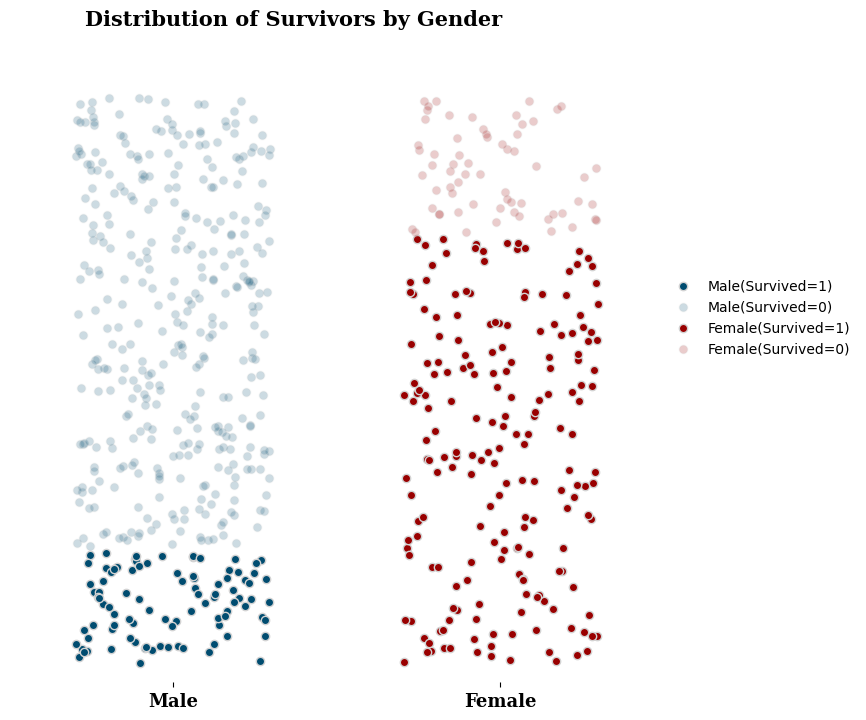

In [58]:
survival_rate = train.groupby('Sex')['Survived'].mean()

male_rate = survival_rate.loc['male']
female_rate = survival_rate.loc['female']

male_pos = np.random.uniform(0, male_rate, len(train[(train['Sex']=='male') & (train['Survived']==1)]))
male_neg = np.random.uniform(male_rate, 1, len(train[(train['Sex']=='male') & (train['Survived']==0)]))
female_pos = np.random.uniform(0, female_rate, len(train[(train['Sex']=='female') & (train['Survived']==1)]))
female_neg = np.random.uniform(female_rate, 1, len(train[(train['Sex']=='female') & (train['Survived']==0)]))

fig, ax = plt.subplots(1, 1, figsize=(9, 7))

np.random.seed(42)

# Male Stripplot
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), male_pos, color='#004c70', edgecolor='lightgray', label='Male(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), male_neg, color='#004c70', edgecolor='lightgray', alpha=0.2, label='Male(Survived=0)')

# Female Stripplot
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_pos)), female_pos, color='#990000', edgecolor='lightgray', label='Female(Survived=1)')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_neg)), female_neg, color='#990000', edgecolor='lightgray', alpha=0.2, label='Female(Survived=0)')

# Set Figure & Axes
ax.set_xlim(-0.5, 2.0)
ax.set_ylim(-0.03, 1.1)

# Ticks
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'], fontweight='bold', fontfamily='serif', fontsize=13)
ax.set_yticks([], minor=False)
ax.set_ylabel('')

# Spines
for s in ["top","right","left", 'bottom']:
    ax.spines[s].set_visible(False)


# Title & Explanation
fig.text(0.1, 1, 'Distribution of Survivors by Gender', fontweight='bold', fontfamily='serif', fontsize=15)    

ax.legend(loc=(0.8, 0.5), edgecolor='None')
plt.tight_layout()
plt.show()


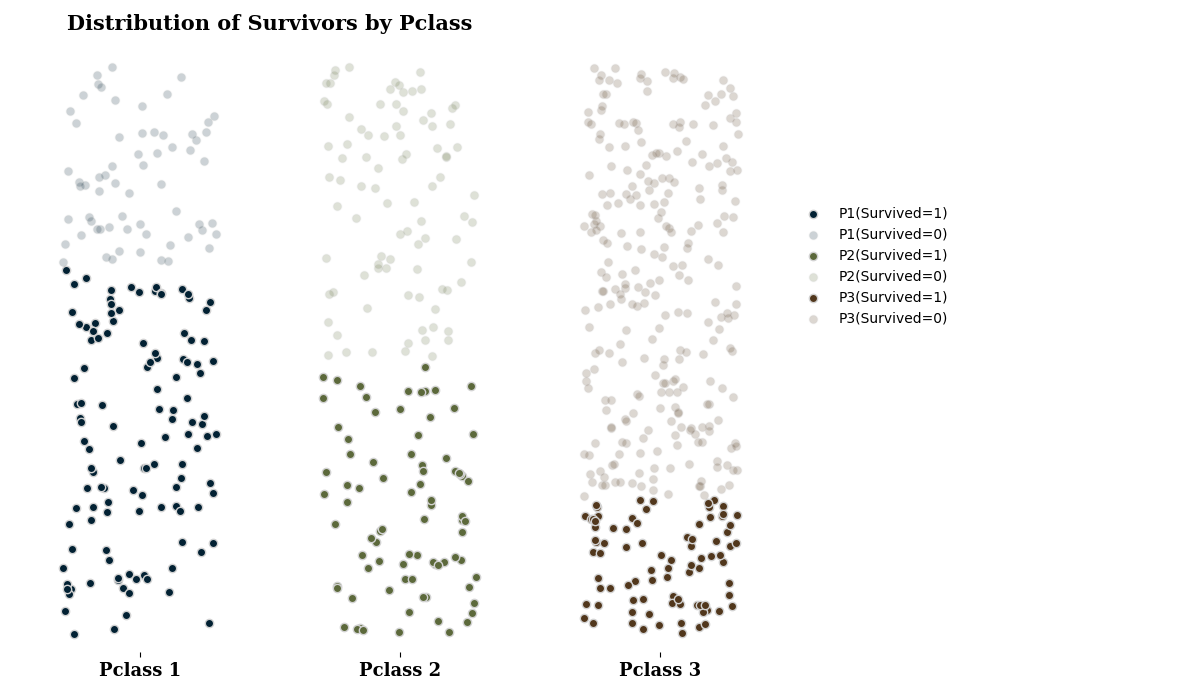

In [59]:
survival_rate = train.groupby('Pclass')['Survived'].mean()
p1_rate = survival_rate.loc[1]
p2_rate = survival_rate.loc[2]
p3_rate = survival_rate.loc[3]

p1_pos = np.random.uniform(0, p1_rate, len(train[(train['Pclass']==1) & (train['Survived']==1)]))
p1_neg = np.random.uniform(p1_rate, 1, len(train[(train['Pclass']==1) & (train['Survived']==0)]))
p2_pos = np.random.uniform(0, p2_rate, len(train[(train['Pclass']==2) & (train['Survived']==1)]))
p2_neg = np.random.uniform(p2_rate, 1, len(train[(train['Pclass']==2) & (train['Survived']==0)]))
p3_pos = np.random.uniform(0, p3_rate, len(train[(train['Pclass']==3) & (train['Survived']==1)]))
p3_neg = np.random.uniform(p3_rate, 1, len(train[(train['Pclass']==3) & (train['Survived']==0)]))

fig, ax = plt.subplots(1, 1, figsize=(12, 7))

np.random.seed(42)

ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_pos)), p1_pos, color='#022133', edgecolor='lightgray', label='P1(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_neg)), p1_neg, color='#022133', edgecolor='lightgray', alpha=0.2, label='P1(Survived=0)')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_pos)), p2_pos, color='#5c693b', edgecolor='lightgray', label='P2(Survived=1)')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_neg)), p2_neg, color='#5c693b', edgecolor='lightgray', alpha=0.2, label='P2(Survived=0)')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_pos)), p3_pos, color='#51371c', edgecolor='lightgray', label='P3(Survived=1)')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_neg)), p3_neg, color='#51371c', edgecolor='lightgray', alpha=0.2, label='P3(Survived=0)')



# # Set Figure & Axes
ax.set_xlim(-0.5, 4.0)
ax.set_ylim(-0.03, 1.1)

# # Ticks
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Pclass 1', 'Pclass 2', 'Pclass 3'], fontweight='bold', fontfamily='serif', fontsize=13)
ax.set_yticks([], minor=False)
ax.set_ylabel('')

# Spines
for s in ["top","right","left", 'bottom']:
    ax.spines[s].set_visible(False)


# Title & Explanation
fig.text(0.06, 0.95, 'Distribution of Survivors by Pclass', fontweight='bold', fontfamily='serif', fontsize=15, ha='left')    


ax.legend(loc=(0.67, 0.5), edgecolor='None')
plt.tight_layout()
plt.show()

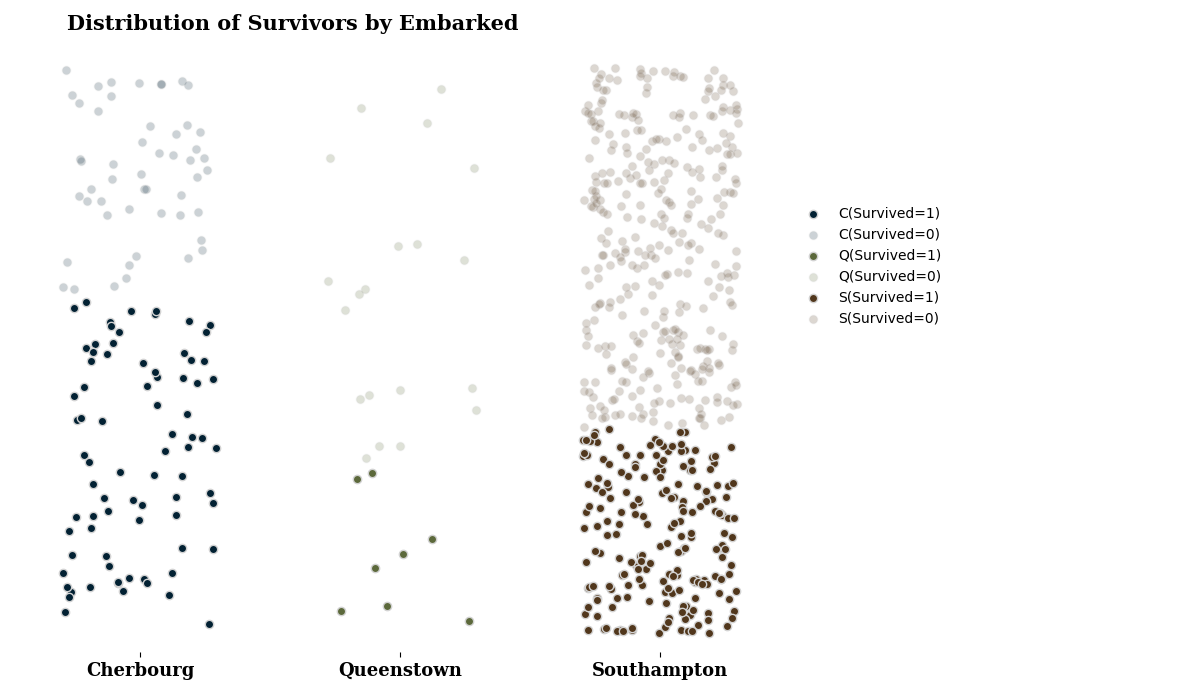

In [60]:
survival_rate = train.groupby('Embarked')['Survived'].mean()
p1_rate = survival_rate.loc['C']
p2_rate = survival_rate.loc['Q']
p3_rate = survival_rate.loc['S']

p1_pos = np.random.uniform(0, p1_rate, len(train[(train['Embarked']=='C') & (train['Survived']==1)]))
p1_neg = np.random.uniform(p1_rate, 1, len(train[(train['Embarked']=='C') & (train['Survived']==0)]))
p2_pos = np.random.uniform(0, p2_rate, len(train[(train['Embarked']=='Q') & (train['Survived']==1)]))
p2_neg = np.random.uniform(p2_rate, 1, len(train[(train['Embarked']=='Q') & (train['Survived']==0)]))
p3_pos = np.random.uniform(0, p3_rate, len(train[(train['Embarked']=='S') & (train['Survived']==1)]))
p3_neg = np.random.uniform(p3_rate, 1, len(train[(train['Embarked']=='S') & (train['Survived']==0)]))

fig, ax = plt.subplots(1, 1, figsize=(12, 7))

np.random.seed(42)

ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_pos)), p1_pos, color='#022133', edgecolor='lightgray', label='C(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_neg)), p1_neg, color='#022133', edgecolor='lightgray', alpha=0.2, label='C(Survived=0)')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_pos)), p2_pos, color='#5c693b', edgecolor='lightgray', label='Q(Survived=1)')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_neg)), p2_neg, color='#5c693b', edgecolor='lightgray', alpha=0.2, label='Q(Survived=0)')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_pos)), p3_pos, color='#51371c', edgecolor='lightgray', label='S(Survived=1)')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_neg)), p3_neg, color='#51371c', edgecolor='lightgray', alpha=0.2, label='S(Survived=0)')



# # Set Figure & Axes
ax.set_xlim(-0.5, 4.0)
ax.set_ylim(-0.03, 1.1)

# # Ticks
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'], fontweight='bold', fontfamily='serif', fontsize=13)
ax.set_yticks([], minor=False)
ax.set_ylabel('')

# Spines
for s in ["top","right","left", 'bottom']:
    ax.spines[s].set_visible(False)


# Title & Explanation
fig.text(0.06, 0.95, 'Distribution of Survivors by Embarked', fontweight='bold', fontfamily='serif', fontsize=15, ha='left')    


ax.legend(loc=(0.67, 0.5), edgecolor='None')
plt.tight_layout()
plt.show()